In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
import os
DATA_FILE = os.path.abspath('DATA/DATA_not_ameliorate.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                             I couldn't be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


NOTISSUE    2028
ISSUE       2027
Name: label, dtype: int64

In [5]:
df.shape

(4055, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


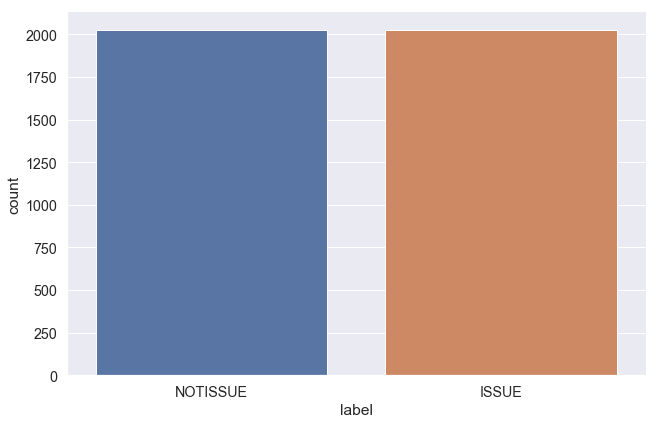

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [8]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 #'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [9]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [10]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

C:\Users\khmar\ana\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [11]:
def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text

In [12]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [13]:
transformText(" she'd've I have so 20 soooooo don't i'm  can't servic going grooooooooop")

'have have twenty soo do not be service go group'

In [14]:
df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']

In [ ]:
#df['text'] = df['text'].map(lambda x: transformText(x))

In [13]:
#df=df[texts,tags]

In [51]:
# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('Data/DATA_preprocessing5.csv')

In [52]:
####

In [16]:
DATA_FILE = 'Data/DATA_preprocessing5.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [17]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [18]:
train_df=df[msk]
test_df=df[~msk]

In [19]:
print(train_df.shape)
print(test_df.shape)

(2821, 3)
(1235, 3)


In [20]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1429
ISSUE       1392
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       639
NOTISSUE    596
Name: label, dtype: int64


In [21]:
train_df['label'].value_counts()


NOTISSUE    1429
ISSUE       1392
Name: label, dtype: int64

In [22]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [23]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [24]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [25]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [26]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [27]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2821, 200)
Shape of test_data tensor: (1235, 200)


In [28]:
import pickle
file_tok = 'LSTM_token_glove_300d_DATA_wit_text_processing.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [29]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3104 unique tokens.


In [30]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2821, 200)
Shape of data test tensor: (1235, 200)


In [31]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [32]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [33]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : cosiness
word not found : untasted
word not found : profiterole
word not found : cheesecurds
word not found : smashburger
word not found : ciob
word not found : 89900
word not found : barset
word not found : plantronincs
word not found : a325
word not found : notslide
word not found : supertooth
word not found : reoccure
word not found : 8125
word not found : s740
word not found : emailinc
word not found : convertor
word not found : nottranslate
word not found : convolute
word not found : stylize
word not found : nomish
word not found : brainsucking
word not found : tigerlilly
word not found : infatuate
word not found : hydrabrush
word not found : flavourless
word not found : douchebaggery
word not found : chipolte
word not found : albondigas


In [34]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 31 out of vocab '

In [35]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2821 samples, validate on 1235 samples
Epoch 1/2
2821/2821 [==============================] - 30s 11ms/step - loss: 0.5273 - acc: 0.7501 - val_loss: 0.4499 - val_acc: 0.7992
Epoch 2/2
2821/2821 [==============================] - 22s 8ms/step - loss: 0.4036 - acc: 0.8252 - val_loss: 0.4135 - val_acc: 0.8130


In [38]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1235/1235 [==============================] - 2s 2ms/step
loss: 41.35%
acc: 81.30%


In [39]:
# Save the model
model_glove.save('Model/LSTM_model_glove_300_DATA_with_text_processing_v5.sav')

### Prediction

In [40]:
##one text prediction!

In [41]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [42]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.930821]]
NOTISSUE


In [43]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.4218202]]
ISSUE


In [44]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.6891911]]
NOTISSUE


In [45]:
#predict all data

In [46]:
input_file ='DATA/DATA_preprocessing5.csv'
output_file ='Model/LSTM_data_pred_glove_300_with_text_v99.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.53022337]] NOTISSUE
2 love phone [[0.87554765]] NOTISSUE
3 get well finish product [[0.69426185]] NOTISSUE
4 not be happier [[0.40165022]] ISSUE
5 look headset long time have get [[0.52562666]] NOTISSUE
6 headset start ring no reason [[0.19130261]] ISSUE
7 display excellent camera good year [[0.9961675]] NOTISSUE
8 battery life great [[0.97841966]] NOTISSUE
9 worst phone have have have month [[0.18499114]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.29792786]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.31276596]] ISSUE
12 protect phone side [[0.5891139]] NOTISSUE
13 average phone bad battery life operate weak network [[0.05375101]] ISSUE
14 clear skye call long battery life long range [[0.7963406]] NOTISSUE
15 solo technology suck [[0.43687016]] ISSUE
16 great hand free device [[0.97066665]] NOTISSUE
17 take self portrait outside exterior display cool [[0.80469036]] NOTISSUE
18 problem h

139 not recommend item anyone [[0.29219124]] ISSUE
140 holster arrive not match photo ad [[0.21532042]] ISSUE
141 great no problem all [[0.69889957]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.23962632]] ISSUE
143 frog phone charm adorable eye catch [[0.8857107]] NOTISSUE
144 never know push hard right number time function want not [[0.32233906]] ISSUE
145 sound clear people talk amaze quality too [[0.48884946]] ISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.94089335]] NOTISSUE
147 good product well make [[0.95216686]] NOTISSUE
148 mobile phone tool have [[0.7654799]] NOTISSUE
149 be impress job motorola steadiness phone [[0.4479342]] ISSUE
150 receive order well ship timeframe everything good work order overall be excite have source [[0.7021581]] NOTISSUE
151 phone sturdy waterproof [[0.6771135]] NOTISSUE
152 be not impress not recommend item anyone [[0.17880361]] ISSUE
153 complaint standard sound volume little low tu

271 post detail comment grey black phone have fire red great color [[0.6436542]] NOTISSUE
272 not have problem item order again need [[0.30958667]] ISSUE
273 get pay guess [[0.28240344]] ISSUE
274 not software do great job this make intone form exist cd internet connection [[0.5445214]] NOTISSUE
275 im surprise good quality car charger not review it [[0.9554193]] NOTISSUE
276 fabulous [[0.9017126]] NOTISSUE
277 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.06318979]] ISSUE
278 price cable excellent [[0.94042975]] NOTISSUE
279 disappoint accessory good manufacturer [[0.6033975]] NOTISSUE
280 perform awful muffle tinny incoming sound severe echo end call [[0.05253346]] ISSUE
281 wind resistant [[0.36832696]] ISSUE
282 obviously have terrible customer service get pay for [[0.19728693]] ISSUE
283 do not forever [[0.16659492]] ISSUE
284 it not overly expensive replace [[0.09312934]] ISSUE
285 easy operate sound better have try [[0.800

398 convenient simple use get job make car ride smoother [[0.78776455]] NOTISSUE
399 nano state it my son disappoint [[0.28166556]] ISSUE
400 sound quality excellent well [[0.9905137]] NOTISSUE
401 best headset have use [[0.8023039]] NOTISSUE
402 not recommend [[0.47685596]] ISSUE
403 have be year carry highest quality anti glare screen protector have find date [[0.5990174]] NOTISSUE
404 want [[0.5557698]] NOTISSUE
405 particular model not work motorola q smartphone [[0.567951]] NOTISSUE
406 wont work right at least me [[0.56862515]] NOTISSUE
407 addition feel amp look phone lightweight cheap plastic [[0.7894401]] NOTISSUE
408 out warranty problem reoccure bottom line money else singular not support it [[0.2211943]] ISSUE
409 want plantronics five ten be right one have issue me the good [[0.711258]] NOTISSUE
410 crisp clear [[0.72106403]] NOTISSUE
411 charge keep go dead minute [[0.15640348]] ISSUE
412 cheap plastic creak like old wooden floor [[0.5800971]] NOTISSUE
413 get absolutely 

539 cutout button place perfectly [[0.9410198]] NOTISSUE
540 love be able use one headset land line cell [[0.6821839]] NOTISSUE
541 problem ear loop make weak material break easily [[0.10323054]] ISSUE
542 not nearly good look amazon picture make look [[0.30070102]] ISSUE
543 despite flaw case exceptional quality well worth additional cost own official oem product [[0.27349314]] ISSUE
544 stupid that [[0.08422956]] ISSUE
545 hear be drive car usually do steven have loudest set [[0.4440367]] ISSUE
546 seller ship quickly cheaper competitor [[0.5176348]] NOTISSUE
547 good show samsung [[0.9158674]] NOTISSUE
548 buy ten save a lot money [[0.5873455]] NOTISSUE
549 cut make beep beep beep sound say signal fail [[0.0473296]] ISSUE
550 configure [[0.5473646]] NOTISSUE
551 phone sound ok not great ok wife phone totally unintelligible not understand word be say it [[0.17942949]] ISSUE
552 have take battery phone back restart it [[0.46010214]] ISSUE
553 manage bend leaf spring back place metal h

690 have deal bad customer service [[0.15405533]] ISSUE
691 six extremely frustrate hour [[0.27078682]] ISSUE
692 do not have problem software [[0.1746006]] ISSUE
693 reverse error be nightmare [[0.04335679]] ISSUE
694 pretty do need [[0.62740123]] NOTISSUE
695 point customer service rep nice [[0.80864936]] NOTISSUE
696 do not have infrastructure provide basic level service [[0.32336947]] ISSUE
697 customer support system payroll upgrade product scary [[0.38565078]] ISSUE
698 do not send receipt [[0.10909583]] ISSUE
699 receipt get copy invoice not format print correctly [[0.18315409]] ISSUE
700 disturb people suppose be account expert [[0.25797045]] ISSUE
701 start look alternative intuit obviously do not understand basic account audit principle [[0.18164481]] ISSUE
702 thoroughly disappoint [[0.291927]] ISSUE
703 be not do business company anymore give bad support [[0.06404649]] ISSUE
704 online information exactly have cd [[0.6752898]] NOTISSUE
705 have not send coupon [[0.23283823]

837 bad actually want learn pronounce be say [[0.12863095]] ISSUE
838 totally useless do not know basic french grammar [[0.14317948]] ISSUE
839 try use product learn become nightmare [[0.1555215]] ISSUE
840 do have version word phrase make easier sound out [[0.18877086]] ISSUE
841 unfortunately basic japanese grammar japanese alphabet write japanese [[0.14908108]] ISSUE
842 not click have sound you [[0.3758147]] ISSUE
843 have no clue sound out [[0.182322]] ISSUE
844 click sound [[0.58658624]] NOTISSUE
845 teach nothing read language [[0.22248009]] ISSUE
846 have be familiar japanese order use product [[0.28173915]] ISSUE
847 experience product say get quickly [[0.5604685]] NOTISSUE
848 product useful [[0.7181155]] NOTISSUE
849 probably have stop [[0.28157026]] ISSUE
850 want learn language look book cassette cd [[0.61533284]] NOTISSUE
851 give no star [[0.46981573]] ISSUE
852 waste [[0.18076299]] ISSUE
853 interface underwhelming [[0.18086082]] ISSUE
854 need guess [[0.54158413]] NOTI

997 make play hard frustrate [[0.31426433]] ISSUE
998 game extremely clichy [[0.40659603]] ISSUE
999 idea great [[0.95824194]] NOTISSUE
1000 ugly [[0.06783834]] ISSUE
1001 new notebook note receive mail [[0.486691]] ISSUE
1002 wireless connection network [[0.59211105]] NOTISSUE
1003 not recommend product [[0.38985723]] ISSUE
1004 very very slow move aimless movie distress drift young man [[0.10453116]] ISSUE
1005 not sure lose flat character audience nearly half walk out [[0.16052164]] ISSUE
1006 attempt wariness black white clever camera angle movie disappoint become ridiculous act poor plot line non existent [[0.02679314]] ISSUE
1007 little music speak of [[0.36029118]] ISSUE
1008 rest movie lack art charm mean emptiness work guess empty [[0.09153988]] ISSUE
1009 waste two hour [[0.15961194]] ISSUE
1010 have average act main person low budget clearly see [[0.18941872]] ISSUE
1011 short film certainly pull no punch [[0.26710367]] ISSUE
1012 graphic far best game [[0.68750584]] NOTISSU

1126 however recently watch thing again do completely strike extremely stupid storyline contain hole inconsistency frankly lot crap horrid dance be [[0.10197099]] ISSUE
1127 mean realistic world never have get ballet repertory thing pathetic [[0.17062128]] ISSUE
1128 character development lack depth [[0.23273513]] ISSUE
1129 wo talk awful [[0.03509999]] ISSUE
1130 do not waste time [[0.11356787]] ISSUE
1131 horrible [[0.05187718]] ISSUE
1132 worst happiest dialogue go on [[0.261718]] ISSUE
1133 make unmatchable direction [[0.48119637]] ISSUE
1134 poor actor [[0.16893096]] ISSUE
1135 not tell have talent not have pathetic line speak director give no action [[0.10885637]] ISSUE
1136 check director filmography site see film not have chance [[0.60536176]] NOTISSUE
1137 not be good make tv flick [[0.3053345]] ISSUE
1138 regrettably film fail [[0.16494142]] ISSUE
1139 movie lack visual interest drama expression feel celebration patriotism underline narrative [[0.40237123]] ISSUE
1140 no actr

1245 plot be derivative predictable end like mercy kill [[0.07433246]] ISSUE
1246 awful dialogue hopeless operate get shoot real waste space time [[0.09152396]] ISSUE
1247 uneasy bad movie be not scar all [[0.12934451]] ISSUE
1248 dialogue compose thing make little sense [[0.54952013]] NOTISSUE
1249 thirty minute footage waste show mediocre elderly actor [[0.07559413]] ISSUE
1250 direct sloppy best [[0.09641823]] ISSUE
1251 hackneyed write certainly make worse bad direct [[0.01938835]] ISSUE
1252 course act blah [[0.30159536]] ISSUE
1253 act cast be scale balance perfectly operate interact [[0.87257785]] NOTISSUE
1254 and finally that get end have be great have be handle competent people not jerry farwell [[0.42832735]] ISSUE
1255 particularly remember sense be assault strident cord music blare little warn mean [[0.22568727]] ISSUE
1256 sort pap screen afternoon punish unemployed not have job [[0.22796974]] ISSUE
1257 ten minute film start have second thought [[0.3154263]] ISSUE
1258 h

1363 time open mouth expect hear you see kid pull plug mercy kill horrible show [[0.04107992]] ISSUE
1364 story unbelievable actor [[0.87877446]] NOTISSUE
1365 lame be best way describe it [[0.3879034]] ISSUE
1366 im big fan rpg game too movie disgrace self respect roger be [[0.4397849]] ISSUE
1367 line cut audio everything wrong [[0.24701472]] ISSUE
1368 find better movie couture [[0.73867905]] NOTISSUE
1369 line do not waste time money one bad come [[0.04716158]] ISSUE
1370 lassie movie have be put sleep forever [[0.38354746]] ISSUE
1371 have describe painfully dreary time waster film [[0.09313869]] ISSUE
1372 mediocre aspect become dull [[0.14202443]] ISSUE
1373 steven achievement so bad it be good so bad it be memorable movie [[0.22764353]] ISSUE
1374 empty hollow shell movie [[0.12925209]] ISSUE
1375 seriously not worth waste your kid time on [[0.21101773]] ISSUE
1376 avoid avoid avoid [[0.02367984]] ISSUE
1377 drive bark mad [[0.51659393]] NOTISSUE
1378 nothing new there [[0.4916

1487 structure film easily tightly construct history cinema [[0.7996921]] NOTISSUE
1488 think no film vitally important occur minute [[0.36645916]] ISSUE
1489 word content level film easily fill dozen film [[0.5079651]] NOTISSUE
1490 right mind ask movie this [[0.6728442]] NOTISSUE
1491 simply highest superlative form cinema imaginable [[0.8024019]] NOTISSUE
1492 yes film do require significant puzzle solve piece fit create beautiful picture [[0.9606471]] NOTISSUE
1493 number one best th game series [[0.8605808]] NOTISSUE
1494 deserve strong love [[0.9470703]] NOTISSUE
1495 insane game [[0.41059563]] ISSUE
1496 massive level massive unworkable character massive game [[0.35491994]] ISSUE
1497 waste money game [[0.23961449]] ISSUE
1498 kind money waste properly [[0.19280444]] ISSUE
1499 actually graphic good time [[0.7490303]] NOTISSUE
1500 say canada fun game aye [[0.7738691]] NOTISSUE
1501 game rock [[0.5961374]] NOTISSUE
1502 buy it play it enjoy it love it [[0.97376776]] NOTISSUE
150

1611 interest action suspense unneeded controversy [[0.33310008]] ISSUE
1612 everything act cinematography solid [[0.8785739]] NOTISSUE
1613 damian talented versatile way write portray different character screen [[0.9427186]] NOTISSUE
1614 movie have cut edge it [[0.65208274]] NOTISSUE
1615 be please know modern day genius let passion art drive take audience him [[0.6046772]] NOTISSUE
1616 awesome movie buy bay [[0.96990013]] NOTISSUE
1617 love story [[0.93521905]] NOTISSUE
1618 set amaze stylize beautiful effective [[0.99079907]] NOTISSUE
1619 be use exemplar set designer [[0.58918405]] NOTISSUE
1620 story powerful exploration nature man art [[0.9501796]] NOTISSUE
1621 watch film want learn work artist [[0.6928158]] NOTISSUE
1622 high adventure best [[0.96503407]] NOTISSUE
1623 have humour get get day apt [[0.6439183]] NOTISSUE
1624 impress [[0.51381606]] NOTISSUE
1625 non linear narration flashback articulate well [[0.71942294]] NOTISSUE
1626 good commentary today love undoubtedly fi

1738 movie awesome [[0.8992296]] NOTISSUE
1739 extraordinary film [[0.89562356]] NOTISSUE
1740 film well pace understate one best courtroom documentary have see [[0.8420093]] NOTISSUE
1741 wonderful inspire watch [[0.9887185]] NOTISSUE
1742 edit film phenomenal opinion [[0.7562006]] NOTISSUE
1743 film offer delight surprise [[0.9617198]] NOTISSUE
1744 understate film leave last impression [[0.10667294]] ISSUE
1745 warmth generate contrast austere backdrop [[0.86231613]] NOTISSUE
1746 leave theater want go dance star [[0.6323647]] NOTISSUE
1747 act have expect cast notch [[0.4223963]] ISSUE
1748 character flesh surprisingly well actor deliver sharply script line right deadpan tongue cheek make dialogue hilarious realistic [[0.8754196]] NOTISSUE
1749 love it [[0.93041205]] NOTISSUE
1750 long time entertain movie [[0.6171196]] NOTISSUE
1751 struggle find bad say it [[0.13808833]] ISSUE
1752 amaze job [[0.81909055]] NOTISSUE
1753 movie possibly one creative work horror ever [[0.62219876]] 

1862 want sandwich go warehouse [[0.343947]] ISSUE
1863 greek salad greek dress tasty pity hummus refresh [[0.91105664]] NOTISSUE
1864 order duck rare pink tender inside nice character outside [[0.9760139]] NOTISSUE
1865 come run realize husband have leave sunglass table [[0.537747]] NOTISSUE
1866 chow mein good [[0.86822855]] NOTISSUE
1867 have horrible attitude towards customer talk one customer do not enjoy food [[0.2485322]] ISSUE
1868 portion huge [[0.55034375]] NOTISSUE
1869 love it friendly server great food wonderful imaginative menu [[0.9997913]] NOTISSUE
1870 heart attack grill downtown vega absolutely flat line excuse restaurant [[0.13740438]] ISSUE
1871 not seafood like five string pasta bottom [[0.21038552]] ISSUE
1872 salad have right sauce not power scallop perfectly cook [[0.9426417]] NOTISSUE
1873 rip banana not rip petrify tasteless [[0.0324659]] ISSUE
1874 think refill water struggle wave ten minute [[0.18120633]] ISSUE
1875 place receive star appetite [[0.7111314]] 

1986 lordy khan so dish not be miss curry lover [[0.74040323]] NOTISSUE
1987 everything menu terrific thrill make amaze accommodation vegetarian daughter [[0.9985267]] NOTISSUE
1988 catch night judge review be not inspire go back [[0.21073912]] ISSUE
1989 service leave lot be desire [[0.44557434]] ISSUE
1990 atmosphere modern hip maintain touch cosiness [[0.93533134]] NOTISSUE
1991 not weekly haunt definitely place come back while [[0.45750448]] ISSUE
1992 literally sit twenty minute no one ask take order [[0.12396838]] ISSUE
1993 burger have absolutely no flavor meat totally bland burger overcook no charcoal flavor [[0.05926285]] ISSUE
1994 decide not send back waitress look like verge have heart attack [[0.17227973]] ISSUE
1995 dress be treat rudely [[0.4774302]] ISSUE
1996 probably dirt [[0.15094797]] ISSUE
1997 love place hit spot want healthy not lack quantity flavor [[0.5051479]] NOTISSUE
1998 order lemon raspberry ice cocktail incredible [[0.97503054]] NOTISSUE
1999 food suck ex

2127 instruction manual lack [[0.0920662]] ISSUE
2128 slim fit alarm clock dock station remove case [[0.28558722]] ISSUE
2129 phone hold charge like new [[0.5951114]] NOTISSUE
2130 battery unreliable well service use antenna [[0.36265358]] ISSUE
2131 uncomfortable sound quality poor compare phone razor previous wire headset that plug lg [[0.2839953]] ISSUE
2132 have get lot compliment it [[0.7718351]] NOTISSUE
2133 definitely have state do not allow cell phone usage drive [[0.1947355]] ISSUE
2134 want money back [[0.38887587]] ISSUE
2135 love device [[0.89831465]] NOTISSUE
2136 be happy price [[0.8017003]] NOTISSUE
2137 order product unhappy immediately [[0.17957616]] ISSUE
2138 engage lack barbuda [[0.1589802]] ISSUE
2139 able do voice deal car no problem [[0.2769556]] ISSUE
2140 have 2 3 bar cell phone be home cant not hear anything [[0.12085865]] ISSUE
2141 good item low price [[0.75664735]] NOTISSUE
2142 however the riingtones not best game [[0.43112168]] ISSUE
2143 plug not work w

2264 have use repeatedly past month major problem [[0.18270428]] ISSUE
2265 have trouble unit start [[0.23512328]] ISSUE
2266 replace battery send unit solve problem [[0.35564756]] ISSUE
2267 have no problem far [[0.19125627]] ISSUE
2268 good need [[0.9082396]] NOTISSUE
2269 deputy que j ai de probe me de do stout au r veil cet extender lombard fait de marseille pour mon do [[0.21007708]] ISSUE
2270 have mild acne problem year round get worst time month that have run try new product [[0.16051559]] ISSUE
2271 day ago buy zeno be go return it nothing accept think burn me [[0.11025872]] ISSUE
2272 so overall do like product recommend it [[0.55979025]] NOTISSUE
2273 have be shaver two week have not have problem it [[0.3415533]] ISSUE
2274 good deal money [[0.8209655]] NOTISSUE
2275 recommend give gift [[0.9458477]] NOTISSUE
2276 problem munchies night watch tv crave go [[0.27197003]] ISSUE
2277 side flush thing result problem experience [[0.34211445]] ISSUE
2278 easy use clean have have ch

2388 have hear good thing place exceed hope have dream of [[0.8111706]] NOTISSUE
2389 food great service [[0.9639904]] NOTISSUE
2390 warm beer not help [[0.6735676]] NOTISSUE
2391 great brunch spot [[0.9840949]] NOTISSUE
2392 service friendly invite [[0.85100764]] NOTISSUE
2393 good lunch spot [[0.91176003]] NOTISSUE
2394 have live one thousand nine seventy nine and last time have step foot place [[0.45134977]] ISSUE
2395 worst experience ever [[0.20963807]] ISSUE
2396 have be night place [[0.6234508]] NOTISSUE
2397 side relish mix mushroom yukon gold puree white corn beauteous [[0.9626939]] NOTISSUE
2398 bug never show have give four sure wall bug climb kitchen [[0.27017993]] ISSUE
2399 ten minute wait salad realize oncoming time soon [[0.22873856]] ISSUE
2400 friend love salmon tartar [[0.9865993]] NOTISSUE
2401 wo no-go back [[0.11985901]] ISSUE
2402 extremely tasty [[0.91416454]] NOTISSUE
2403 waitress good though [[0.9216545]] NOTISSUE
2404 soggy not good [[0.13235512]] ISSUE
2405

2521 everything gross [[0.25934058]] ISSUE
2522 love place [[0.93468845]] NOTISSUE
2523 great service food [[0.96973735]] NOTISSUE
2524 bathroom location dirty seat cover not replenish plain yucky [[0.03542733]] ISSUE
2525 burger get gold standard 17 burger kind disappoint [[0.31184137]] ISSUE
2526 omg food delicious [[0.9370762]] NOTISSUE
2527 nothing authentic place [[0.4904999]] ISSUE
2528 spaghetti nothing special whatsoever [[0.15823032]] ISSUE
2529 dish salmon best great [[0.9958691]] NOTISSUE
2530 vegetable fresh sauce feel like authentic thai [[0.8876002]] NOTISSUE
2531 worth drive tucson [[0.70963866]] NOTISSUE
2532 selection probably worst have see vega there none [[0.2427968]] ISSUE
2533 pretty good beer selection too [[0.93231356]] NOTISSUE
2534 place like chipotle better [[0.8114525]] NOTISSUE
2535 classy warm atmosphere fun fresh appetite succulent steak baseball steak [[0.99907315]] NOTISSUE
2536 five star brick oven bread app [[0.8541853]] NOTISSUE
2537 have eat multipl

2656 love margarita too [[0.85501087]] NOTISSUE
2657 vega buffet not disappoint [[0.37400362]] ISSUE
2658 good though [[0.85275996]] NOTISSUE
2659 one note ventilation use upgrade [[0.23933364]] ISSUE
2660 great pork sandwich [[0.96225774]] NOTISSUE
2661 do not waste time here [[0.18047991]] ISSUE
2662 total letdown go comeback flower shop cartel coffee [[0.39495203]] ISSUE
2663 third cheese friend burger cold [[0.67823005]] NOTISSUE
2664 enjoy pizza brunch [[0.9916767]] NOTISSUE
2665 steak well trim perfectly cook [[0.99351066]] NOTISSUE
2666 have group 70 claim have forty handle beautifully [[0.8634267]] NOTISSUE
2667 love it [[0.93041205]] NOTISSUE
2668 ask bill leave eat nothing either [[0.08247748]] ISSUE
2669 place jewel la vega exactly have be hop find nearly ten year live here [[0.7034961]] NOTISSUE
2670 seafood limit boil shrimp crab leg crab leg definitely not taste fresh [[0.16175991]] ISSUE
2671 selection food not best [[0.61726546]] NOTISSUE
2672 delicious absolutely be ba

2792 food good [[0.8542723]] NOTISSUE
2793 awesome [[0.8965014]] NOTISSUE
2794 want leave [[0.35398212]] ISSUE
2795 make drive way north scottsdale not one bite disappoint [[0.08141134]] ISSUE
2796 not be eat again [[0.25097275]] ISSUE
2797 the owner need quit be soo cheap let wrap freak sandwich two paper not one [[0.28906256]] ISSUE
2798 check place couple year ago not impress [[0.3493836]] ISSUE
2799 chicken get definitely reheat ok wedge cold soggy [[0.02964651]] ISSUE
2800 sorry not be get food anytime soon [[0.15285072]] ISSUE
2801 absolute visit [[0.7527744]] NOTISSUE
2802 cow tongue cheek taco amaze [[0.8937119]] NOTISSUE
2803 friend not like bloody mary [[0.3786715]] ISSUE
2804 despite hard rate business actually rare give one star [[0.5720864]] NOTISSUE
2805 want make experience good one [[0.869712]] NOTISSUE
2806 not return [[0.2907666]] ISSUE
2807 have chicken pho taste bland [[0.17970774]] ISSUE
2808 disappoint [[0.24733865]] ISSUE
2809 grill chicken tender yellow saffron 

2925 love decor chinese calligraphy wall paper [[0.93644774]] NOTISSUE
2926 never have complain here [[0.2815145]] ISSUE
2927 restaurant clean have family restaurant feel it [[0.9009541]] NOTISSUE
2928 way fry [[0.614765]] NOTISSUE
2929 be not sure long stand long begin feel awkwardly place [[0.30045524]] ISSUE
2930 open sandwich impress not good way [[0.47641432]] ISSUE
2931 not be back [[0.26218757]] ISSUE
2932 warm feel service felt like guest special treat [[0.87884474]] NOTISSUE
2933 extensive menu provide lot option breakfast [[0.9823239]] NOTISSUE
2934 order vegetarian menu dinner have wide array option choose from [[0.965967]] NOTISSUE
2935 have watch price inflate portion get smaller management attitude grow rapidly [[0.15008338]] ISSUE
2936 wonderful little tapa ambience make feel warm fuzzy inside [[0.9824754]] NOTISSUE
2937 get enjoy seafood salad fabulous vinaigrette [[0.9978751]] NOTISSUE
2938 wonton thin not thick chewy melt mouth [[0.19194503]] ISSUE
2939 level five spi

3068 meat pretty dry [[0.35033146]] ISSUE
3069 want wait mediocre food downright terrible service place you [[0.04400989]] ISSUE
3070 think food have flavor texture lack [[0.33061177]] ISSUE
3071 all hello again long bay bite flop [[0.10693423]] ISSUE
3072 overall not impress not go back [[0.12782796]] ISSUE
3073 lady table find live green caterpillar salad [[0.73022777]] NOTISSUE
3074 experience underwhelming [[0.3184753]] ISSUE
3075 think go ninja sushi time [[0.67859745]] NOTISSUE
3076 love fry bean [[0.90894794]] NOTISSUE
3077 pleasure deal him [[0.9046317]] NOTISSUE
3078 have plethora salad sandwich everything have try get seal approval [[0.8414359]] NOTISSUE
3079 place awesome want light healthy summer [[0.9915603]] NOTISSUE
3080 sushi strip place go [[0.6800565]] NOTISSUE
3081 probably wo note come back here [[0.38198674]] ISSUE
3082 manager come help table [[0.7357406]] NOTISSUE
3083 service great [[0.9460557]] NOTISSUE
3084 everything deep fry oil [[0.42144346]] ISSUE
3085 wat

3197 good case excellent value [[0.98691005]] NOTISSUE
3198 great jawbone [[0.8177664]] NOTISSUE
3199 tie charger conversation last forty five minute major problem [[0.22257178]] ISSUE
3200 mic great [[0.928404]] NOTISSUE
3201 have giggle plug get line right get decent volume [[0.43057454]] ISSUE
3202 have dozen contact imagine fun send one one [[0.6239619]] NOTISSUE
3203 razor owner you have this [[0.79172677]] NOTISSUE
3204 needle say waste money [[0.23706067]] ISSUE
3205 waste money time [[0.23972952]] ISSUE
3206 sound quality great [[0.9656492]] NOTISSUE
3207 impress go original battery extend battery [[0.62469304]] NOTISSUE
3208 two separate mere 5 ft start notice excessive static garble sound headset [[0.24330811]] ISSUE
3209 good quality [[0.9113936]] NOTISSUE
3210 design odd ear clip not comfortable all [[0.8830889]] NOTISSUE
3211 highly recommend one have blue tooth phone [[0.87773615]] NOTISSUE
3212 advise do not be fool [[0.14976585]] ISSUE
3213 far good [[0.76700795]] NOTIS

3330 buyer be careful [[0.47009373]] ISSUE
3331 majority logitech earn headset fail [[0.3797256]] ISSUE
3332 good stuff price [[0.853438]] NOTISSUE
3333 headset work peachy keen [[0.95548576]] NOTISSUE
3334 house get drop coverage upstairs no coverage basement [[0.10695863]] ISSUE
3335 voice recognition tremendous [[0.91679037]] NOTISSUE
3336 waste [[0.18076299]] ISSUE
3337 different two minute call experience five drop area have five bar [[0.50921255]] NOTISSUE
3338 not happy item [[0.5001554]] NOTISSUE
3339 phone take forever charge like two five hour literally [[0.12704843]] ISSUE
3340 get phone recommendation relative be glad do [[0.41441602]] ISSUE
3341 waste time [[0.2579292]] ISSUE
3342 reception poor [[0.10260572]] ISSUE
3343 item state include description not include [[0.2791946]] ISSUE
3344 month screen go black sudden [[0.16079755]] ISSUE
3345 hop more [[0.5341401]] NOTISSUE
3346 audio quality poor poor [[0.02958501]] ISSUE
3347 have absolutely no problem headset link eight 

3457 have be night place [[0.6234508]] NOTISSUE
3458 side relish mix mushroom yukon gold puree white corn beauteous [[0.9626939]] NOTISSUE
3459 bug never show have give four sure wall bug climb kitchen [[0.27017993]] ISSUE
3460 ten minute wait salad realize oncoming time soon [[0.22873856]] ISSUE
3461 friend love salmon tartar [[0.9865993]] NOTISSUE
3462 wo no-go back [[0.11985901]] ISSUE
3463 extremely tasty [[0.91416454]] NOTISSUE
3464 waitress good though [[0.9216545]] NOTISSUE
3465 soggy not good [[0.13235512]] ISSUE
3466 jamaican monitor delicious [[0.93464154]] NOTISSUE
3467 small not worth price [[0.30572832]] ISSUE
3468 food rich order accordingly [[0.7053984]] NOTISSUE
3469 service bite lack [[0.05902506]] ISSUE
3470 lobster bisque bussell sprout risotto file need salt pepper and course none table [[0.47738972]] ISSUE
3471 hopefully bode go business cook come in [[0.4977858]] ISSUE
3472 cold not flavor bad [[0.02726901]] ISSUE
3473 love bacon wrap date [[0.9617784]] NOTISSUE
3

3588 spaghetti nothing special whatsoever [[0.15823032]] ISSUE
3589 dish salmon best great [[0.9958691]] NOTISSUE
3590 vegetable fresh sauce feel like authentic thai [[0.8876002]] NOTISSUE
3591 worth drive tucson [[0.70963866]] NOTISSUE
3592 selection probably worst have see vega there none [[0.2427968]] ISSUE
3593 pretty good beer selection too [[0.93231356]] NOTISSUE
3594 place like chipotle better [[0.8114525]] NOTISSUE
3595 classy warm atmosphere fun fresh appetite succulent steak baseball steak [[0.99907315]] NOTISSUE
3596 five star brick oven bread app [[0.8541853]] NOTISSUE
3597 have eat multiple time time food delicious [[0.84356654]] NOTISSUE
3598 sit ten minute finally give leave [[0.20297383]] ISSUE
3599 terrible [[0.0796881]] ISSUE
3600 treat equally special [[0.9140462]] NOTISSUE
3601 cottage thirty minute pancake egg [[0.39181262]] ISSUE
3602 delicious [[0.92789966]] NOTISSUE
3603 good side staff genuinely pleasant enthusiastic real treat [[0.9927625]] NOTISSUE
3604 sadly

3720 great pork sandwich [[0.96225774]] NOTISSUE
3721 do not waste time here [[0.18047991]] ISSUE
3722 total letdown go comeback flower shop cartel coffee [[0.39495203]] ISSUE
3723 third cheese friend burger cold [[0.67823005]] NOTISSUE
3724 enjoy pizza brunch [[0.9916767]] NOTISSUE
3725 steak well trim perfectly cook [[0.99351066]] NOTISSUE
3726 have group 70 claim have forty handle beautifully [[0.8634267]] NOTISSUE
3727 love it [[0.93041205]] NOTISSUE
3728 ask bill leave eat nothing either [[0.08247748]] ISSUE
3729 place jewel la vega exactly have be hop find nearly ten year live here [[0.7034961]] NOTISSUE
3730 seafood limit boil shrimp crab leg crab leg definitely not taste fresh [[0.16175991]] ISSUE
3731 selection food not best [[0.61726546]] NOTISSUE
3732 delicious absolutely be back [[0.96863616]] NOTISSUE
3733 not small family restaurant fine din establishment [[0.5634767]] NOTISSUE
3734 have toro tartar javier extraordinary like thinly slice way white truffle [[0.90515745]] N

3857 make drive way north scottsdale not one bite disappoint [[0.08141134]] ISSUE
3858 not be eat again [[0.25097275]] ISSUE
3859 the owner need quit be soo cheap let wrap freak sandwich two paper not one [[0.28906256]] ISSUE
3860 check place couple year ago not impress [[0.3493836]] ISSUE
3861 chicken get definitely reheat ok wedge cold soggy [[0.02964651]] ISSUE
3862 sorry not be get food anytime soon [[0.15285072]] ISSUE
3863 absolute visit [[0.7527744]] NOTISSUE
3864 cow tongue cheek taco amaze [[0.8937119]] NOTISSUE
3865 friend not like bloody mary [[0.3786715]] ISSUE
3866 despite hard rate business actually rare give one star [[0.5720864]] NOTISSUE
3867 want make experience good one [[0.869712]] NOTISSUE
3868 not return [[0.2907666]] ISSUE
3869 have chicken pho taste bland [[0.17970774]] ISSUE
3870 disappoint [[0.24733865]] ISSUE
3871 grill chicken tender yellow saffron season [[0.7422096]] NOTISSUE
3872 drive mean do not want wait half hour food end go make wait wait [[0.0602177

3988 never have complain here [[0.2815145]] ISSUE
3989 restaurant clean have family restaurant feel it [[0.9009541]] NOTISSUE
3990 way fry [[0.614765]] NOTISSUE
3991 be not sure long stand long begin feel awkwardly place [[0.30045524]] ISSUE
3992 open sandwich impress not good way [[0.47641432]] ISSUE
3993 not be back [[0.26218757]] ISSUE
3994 warm feel service felt like guest special treat [[0.87884474]] NOTISSUE
3995 extensive menu provide lot option breakfast [[0.9823239]] NOTISSUE
3996 order vegetarian menu dinner have wide array option choose from [[0.965967]] NOTISSUE
3997 have watch price inflate portion get smaller management attitude grow rapidly [[0.15008338]] ISSUE
3998 wonderful little tapa ambience make feel warm fuzzy inside [[0.9824754]] NOTISSUE
3999 get enjoy seafood salad fabulous vinaigrette [[0.9978751]] NOTISSUE
4000 wonton thin not thick chewy melt mouth [[0.19194503]] ISSUE
4001 level five spicy perfect spice hoover helm soup [[0.98910624]] NOTISSUE
4002 sit righ

(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                    look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6                 display excellent camera good year  NOTISSUE
 7              7                                 battery life great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10           embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [47]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0  NOTISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4  NOTISSUE                    look headset long time have get


In [48]:
data_predict['label'].value_counts() 

ISSUE       2064
NOTISSUE    1992
Name: label, dtype: int64

### confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1747  284]
 [ 317 1708]]


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

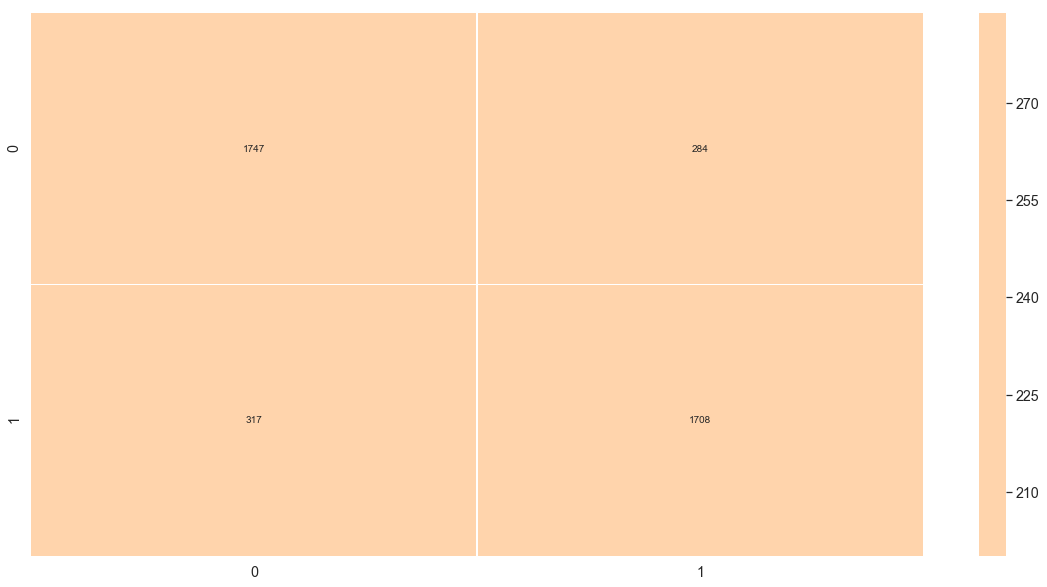

In [52]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

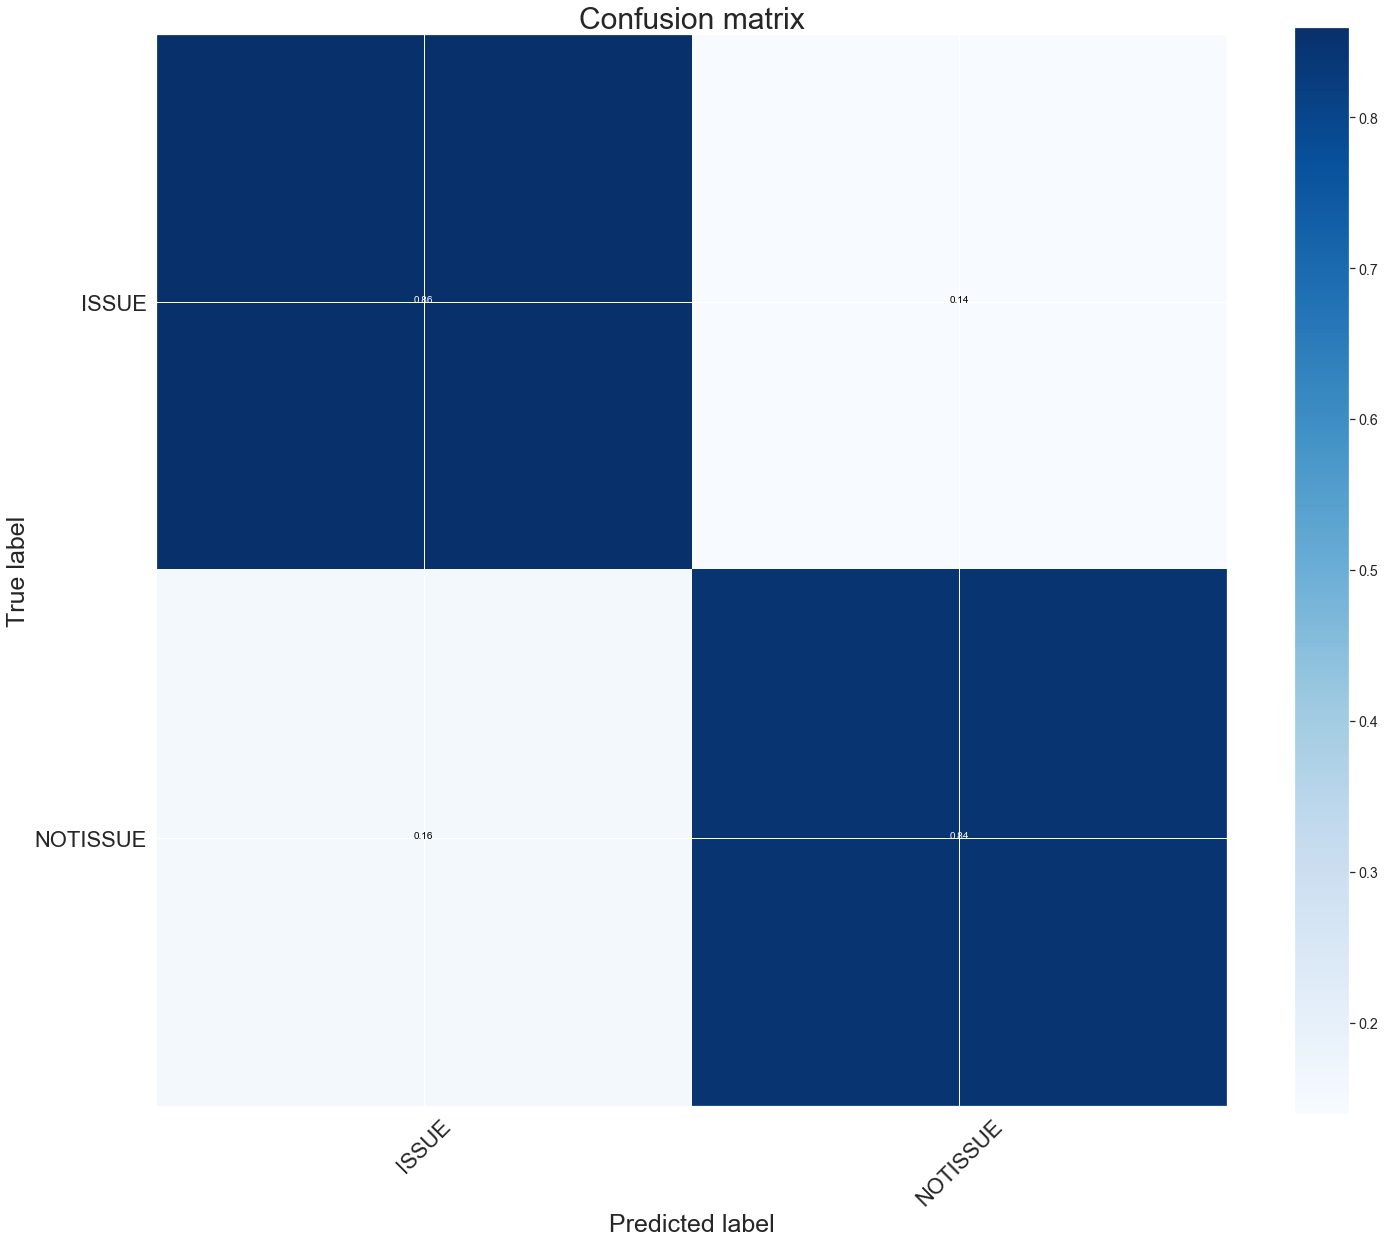

In [54]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [55]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8518244575936884
              precision    recall  f1-score   support

       ISSUE       0.85      0.86      0.85      2031
    NOTISSUE       0.86      0.84      0.85      2025

   micro avg       0.85      0.85      0.85      4056
   macro avg       0.85      0.85      0.85      4056
weighted avg       0.85      0.85      0.85      4056



In [56]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [57]:
falses_file='Data/false_pred_glove300_with_text_preprocessing_v99.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE                                     not be happier
1        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
2        ISSUE   NOTISSUE  stupid have keep buy new charger car charger c...
3     NOTISSUE      ISSUE               phone have have have be cheaply make
4        ISSUE   NOTISSUE                            plastic break easy clip
5     NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
6     NOTISSUE      ISSUE               find cell phone right away enter car
7        ISSUE   NOTISSUE                                        low quality
8     NOTISSUE      ISSUE  do not find it bad again unit come one arpad o...
9     NOTISSUE      ISSUE  have get defect not risk buy again build quali...
10    NOTISSUE      ISSUE                            nothing bad say headset
11    NOTISSUE      ISSUE  be glad find product amazon hard find not high...